{{ badge }}

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.tri as mtri

from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as spint

## Solution

In [2]:
sim_data = np.array([
    [ 20,   1,   8],
    [ 20,   2,   7],
    [ 20,   4,   7],
    [ 20,   6,   6],
    [ 20,  10,   6],
    [ 50,   0.4,  15],
    [ 50,   0.8,  11],
    [ 50,   1,  10],
    [ 50,   2,   8],
    [ 50,   4,   7],
    [ 50,   6,   7],
    [ 50,  10,   7],
    [100,   0.4,  22],
    [100,   0.8,  15],
    [100,   1,  13],
    [100,   2,  10],
    [100,   4,   8],
    [100,   6,   7],
    [100,  10,   7]
])

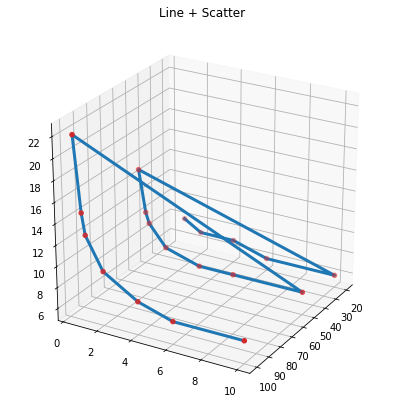

In [3]:
def prepare_fig(fw=7, fh=7, view = (25, 30)):
    fig = plt.figure(figsize=(fw, fh))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(view[0], view[-1])
    return ax


x, y, z = sim_data[:, 0], sim_data[:, 1], sim_data[:, 2]

ax = prepare_fig()
ax.title.set_text('Line + Scatter')
ax.plot(x, y, z, color='tab:blue', linewidth=3)
ax.scatter(x, y, z, color='tab:red')

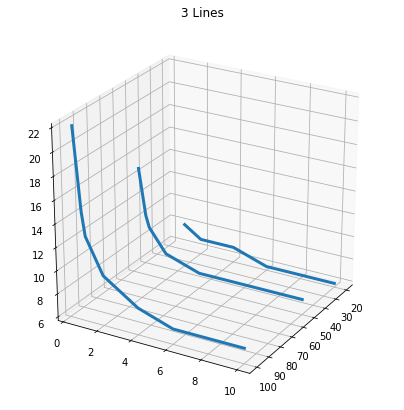

In [4]:
line1 = sim_data[0:5][::-1]  # NOTE: the first line is shorter
line2 = sim_data[5:12][::-1]
line3 = sim_data[12:][::-1]

ax = prepare_fig()
ax.title.set_text('3 Lines')
for line in [line1, line2, line3]:
    x, y, z = line[:, 0], line[:, 1], line[:, 2]
    ax.plot(x, y, z, c='tab:blue', linewidth=3)

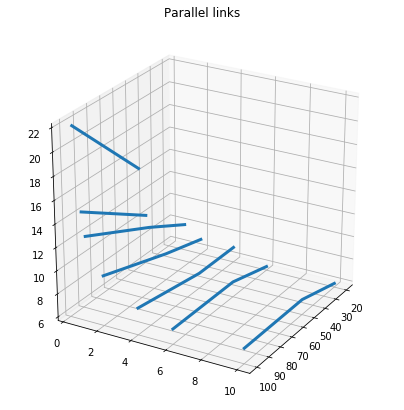

In [5]:
ax = prepare_fig()
ax.title.set_text('Parallel links')
for i in range(len(line3)):
    x, y, z = [], [], []
    if i < len(line1):
        x.append(line1[:, 0][i])
        y.append(line1[:, 1][i])
        z.append(line1[:, 2][i])
    else:
        # put nan because line1 is shorter
        x.append(np.nan)
        y.append(np.nan)
        z.append(np.nan)
    x.extend([line2[:, 0][i], line3[:, 0][i]])
    y.extend([line2[:, 1][i], line3[:, 1][i]])
    z.extend([line2[:, 2][i], line3[:, 2][i]]) 
    ax.plot(x, y, z, c='tab:blue', linewidth=3)

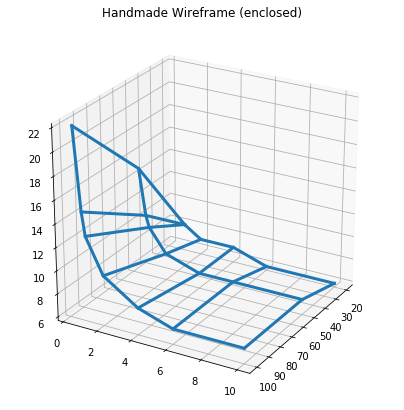

In [6]:
ax = prepare_fig()
ax.title.set_text('Handmade Wireframe (enclosed)')

line1 = sim_data[0:5][::-1]
line2 = sim_data[5:12][::-1]
line3 = sim_data[12:][::-1]

for line in [line1, line2, line3]:
    x, y, z = line[:, 0], line[:, 1], line[:, 2]
    ax.plot(x, y, z, c='tab:blue', linewidth=3)

for i in range(len(line3)):
    x, y, z = [], [], []
    if i < len(line1):
        x.append(line1[:, 0][i])
        y.append(line1[:, 1][i])
        z.append(line1[:, 2][i])
    else:
        # put nan because line1 is shorter
#         x.append(np.nan)
#         y.append(np.nan)
#         z.append(np.nan)
        # Or you can just replace it with last line1 value
        x.append(line1[:, 0][-1])
        y.append(line1[:, 1][-1])
        z.append(line1[:, 2][-1])
    x.extend([line2[:, 0][i], line3[:, 0][i]])
    y.extend([line2[:, 1][i], line3[:, 1][i]])
    z.extend([line2[:, 2][i], line3[:, 2][i]])
    ax.plot(x, y, z, c='tab:blue', linewidth=3)

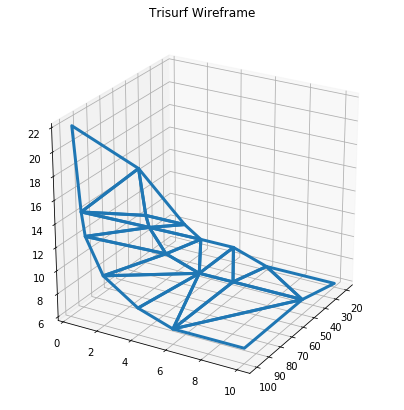

In [7]:
x = sim_data[:, 0]
y = sim_data[:, 1]
z = sim_data[:, 2]

ax = prepare_fig()
ax.title.set_text('Trisurf Wireframe')

trisurf = ax.plot_trisurf(x, y, z)
# turn of surface color, you can control it with alpha here:
trisurf.set_facecolor(mpl.colors.colorConverter.to_rgba('w', alpha=0.0))
# setting wire color
trisurf.set_edgecolor('tab:blue')
#setting wire width
trisurf.set_linewidth(3)

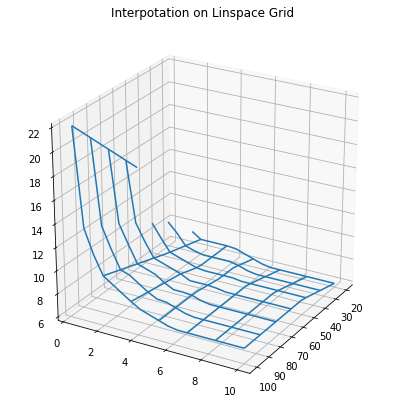

In [8]:
import scipy.interpolate as spint

x = sim_data[:, 0]
y = sim_data[:, 1]
z = sim_data[:, 2]

# generate new linear grid based on previous
X, Y = np.meshgrid(np.linspace(min(x), max(x), len(x)),
                   np.linspace(min(y), max(y), len(y)))

Z = spint.griddata((x, y), z, (X, Y))

ax = prepare_fig()
ax.title.set_text('Interpotation on Linspace Grid')

# ax.plot_trisurf(x, y, z, color='tab:green')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3)
# ax.scatter(X, Y, Z, color='tab:pink', edgecolor='w', s=50, alpha=0.5)
# ax.plot_surface(X, Y, Z)

# X, Y = np.meshgrid(x, y)
# Z = spint.griddata((x, y), z, (X, Y))
# ax.scatter(X, Y, Z, color='tab:red', edgecolor='w', s=50)

/home/trs/anaconda3/envs/pytorch13/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.


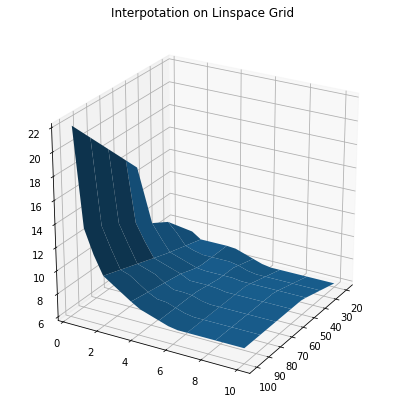

In [9]:
import scipy.interpolate as spint

x = sim_data[:, 0]
y = sim_data[:, 1]
z = sim_data[:, 2]

# generate new linear grid based on previous
X, Y = np.meshgrid(np.linspace(min(x), max(x), len(x)),
                   np.linspace(min(y), max(y), len(y)))

Z = spint.griddata((x, y), z, (X, Y))

ax = prepare_fig()
ax.title.set_text('Interpotation on Linspace Grid')

# ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3)
ax.plot_surface(X, Y, Z, rstride=3, cstride=3)